# Engineering Data Analysis

> **Mohamad M. Hallal, PhD** <br> Teaching Professor, UC Berkeley

[![License](https://img.shields.io/badge/license-CC%20BY--NC--ND%204.0-blue)](https://creativecommons.org/licenses/by-nc-nd/4.0/)
***

# Data Summaries 

In this notebook, we'll explore how to compute summary statistics and create graphical summaries using NVIDIA's historical stock price data. These are essential tools for data analysis, helping us understand the central tendencies, variability, and distribution of stock prices.

Let's get started!

# Dataset

Let's load the provided data set `NVDA.csv`. These are all the features:

| Feature  | Units | Description                            |
| :-       | :-    | :-                                     |
| Date     |       | Day of the year                        |
| Open     | \$    | Opening price of the stock that day    |
| High     | \$    | Highest price of the stock that day    |
| Low      | \$    | Lowest price of the stock that day     |
| Close    | \$    | Closing price of the stock that day    |
| Volume   |       | Total number of shared traded that day |

*[Data source](https://finance.yahoo.com/quote/NVDA/history/)*

Run the cell below, which reads the data and saves it as a variable named `data`.

In [15]:
# Loading Data
import pandas as pd

# Load dataset
data = pd.read_csv('resources/NVDA.csv')

# Display the first few rows of the data using the head() method
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2000,0.098437,0.099219,0.091927,0.097526,300912000
1,1/4/2000,0.095833,0.096094,0.090104,0.094922,300480000
2,1/5/2000,0.092188,0.093750,0.090495,0.091797,188352000
3,1/6/2000,0.091797,0.091797,0.082292,0.085807,120480000
4,1/7/2000,0.085417,0.088151,0.084115,0.087240,71184000


# Summary Statistics

Summary statistics give us an overview of NVIDIA's stock prices. We'll compute the mean, median, mode, standard deviation, variance, min, max, and quantiles for the `'Close'` prices.

We will be working with different columns of the dataset (opening price, closing price, etc.). So, let's create different variables for each column in the dataset.

One way to do this is using `DataFrame['column label']`, where `DataFrame` should be replaced with the DataFrame's name.

<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Assign the values of the closing price to the variable <code>Close</code>.</div>

In [16]:
# extract closing price data
Close = data['Close']

DataFrames have several built-in methods that could be used to obtain descriptive statistics. Below is a list of some common methods.

| Method          | Description                                              |
| :-------------- | :------------------------------------------------------- |
| `mean()`        | Return the mean of the values                            |
| `median()`      | Return the median of the values                          |
| `mode()`        | Return the mode(s) of the values                         |
| `std()`         | Return the sample standard deviation of the values       |
| `var()`         | Return the sample variance of the values                 |
| `min()`         | Return the minimum of the values                         |
| `max()`         | Return the maximum of the values                         |
| `quantile([q])` | Return the specific quantiles of the values (0 <= q <= 1)|

The syntax for these methods is `DataFrame.method()`. These are just a few of the methods available for obtaining descriptive statistics. For a complete list, you can refer to the [official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats).

<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Compute the mean, median, mode(s), standard deviation, variance, coefficient of variation, range, and quartiles of the closing price.</div>

In [17]:
# compute the mean of the closing price
mean = Close.mean()
print(f'The mean closing price is: ${mean:.3f}')

The mean closing price is: $6.856


In [18]:
# compute the median of the closing price
median = Close.median()
print(f'The median closing price is: ${median:.3f}')

The median closing price is: $0.475


In [19]:
# compute the modes of the closing price
mode = Close.mode()
print(f'The mode(s) of the closing price is(are): ${[round(mode.iloc[i],3) for i in range(len(mode))]}')

The mode(s) of the closing price is(are): $[0.361, 0.495]


In [20]:
# compute the standard deviation of the closing price
stdev = Close.std()
print(f'The standard deviation of the closing price is: ${stdev:.3f}')

The standard deviation of the closing price is: $17.690


In [21]:
# compute the variance of the closing price
var = Close.var()
print(f'The variance of the closing price is: $^2 {var:.3f}')

The variance of the closing price is: $^2 312.940


In [22]:
# compute the coefficient of variation of the closing price
cv = stdev / mean * 100
print(f'The coefficient of variation of the closing price is: {cv:.0f}%')

The coefficient of variation of the closing price is: 258%


In [23]:
# compute the range of the closing price
range_price = Close.max() - Close.min()
print(f'The range of the closing price is: ${range_price:.3f}')

The range of the closing price is: $135.519


In [24]:
# compute the quartiles of the closing price
quartiles  = Close.quantile([0.25, 0.5, 0.75])
print(f'The quartiles of the closing price are: $ {[round(quartiles.iloc[i],3) for i in range(len(quartiles))]}')

The quartiles of the closing price are: $ [0.298, 0.475, 4.505]


# Graphical Summaries

Graphical summaries help us visualize the distribution and relationships within NVIDIA's stock prices. We'll create histograms, box plots, scatter plots, and line plots.

## Histogram

Histograms are used to visualize the distribution of numerical data. In Python, you can use the `hist()` function from `matplotlib.pyplot` to plot a histogram. The `hist()` function has many optional parameters. A full list can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html). Here is the basic syntax, along with some common optional parameters:

```python
plt.hist(x, bins=None, color=None, ec=None, ...)
```

where:
* `x`: array or sequence of arrays which includes input values (required)
* `bins`: integer number of bins or sequence of bin edges, default: `bins=10` (optional)
* `color`: color or sequence of colors for the bars (optional)
* `ex`: color or sequence of colors for the edges of the bars (optional)

<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Plot a histogram of the closing price with 12 bins and black edge color. Label the axes.</div> 

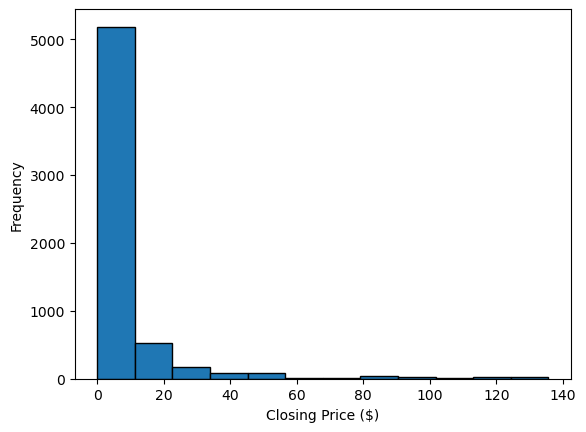

In [26]:
import matplotlib.pyplot as plt

# plot the histogram
plt.hist(Close, bins=12, ec='k')

# label the axes
plt.ylabel('Frequency')
plt.xlabel('Closing Price ($)')

plt.show()

## Boxplot

Boxplots are also used to visualize the distribution of numerical data through their quartiles. In Python, you can use the `boxplot()` function from `matplotlib.pyplot`. The `boxplot()` function has many optional parameters. A full list can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html). Here is the basic syntax, along with some common optional parameters:

```python
plt.boxplot(x, vert=True, showfliers=True, ...)
```

where:
* `x`: array or sequence of arrays which includes input values (required)
* `vert`: If True, draws vertical boxes. If False, draw horizontal boxes, default: `vert=True` (optional)
* `showfliers`: If True, shows the outliers. If False, doesn't show the outliers, default: `showfliers=True` (optional)

<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Create boxplots of the opening, low, high and closing daily prices. Try with and without showing the outliers.</div> 

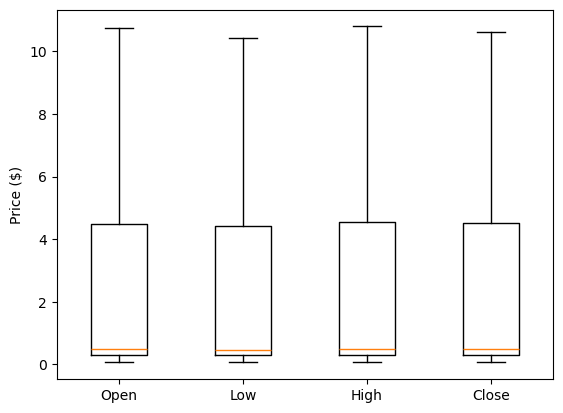

In [28]:
# extract opening, low, and high price data
Open = data['Open']
Low = data['Low']
High = data['High']

# plot the boxplot
plt.boxplot([Open, Low, High, Close], showfliers=False)

# label the y axis
plt.ylabel('Price ($)')

# label data
plt.xticks(ticks=range(1,5), labels=['Open', 'Low', 'High', 'Close'])

plt.show()

## Scatter Plot

Scatter plots are used to visualize the relationship between two numerical variables. In Python, you can use the `scatter()` function from `matplotlib.pyplot`. The `scatter()` function has many optional parameters. A full list can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html). Here is the basic syntax, along with some common optional parameters:

```python
plt.scatter(x, y, s=None, c=None, marker=None, edgecolors=None, ...)
```

where:
* `x`: array-like or scalar horizontal coordinates of the data points (required)
* `y`: array-like or scalar vertical coordinates of the data points (required)
* `s`: float or array-like specifying the marker size (optional)
* `c`: marker colors (optional)
* `marker`: string of marker style, default `marker='o'` (optional)
* `edgecolors`: edge color of the marker, default same color as face/fill (optional)

<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Create a scatter plot of the closing (y) versus opening (x) price. Label the axes.</div> 

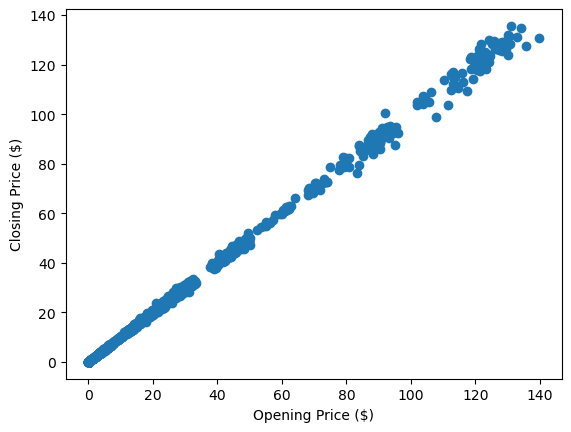

In [29]:
# create the scatter plot
plt.scatter(Open, Close)

# label the axes
plt.xlabel('Opening Price ($)')
plt.ylabel('Closing Price ($)')

plt.show()

## Line Graph

Line graphs are used to visualize trends over time. In Python, you can use the `plot()` function from `matplotlib.pyplot`. The `scatter()` function has many optional parameters. Here is the basic syntax, along with some common optional parameters:

```python
plt.plot(x, y, color=None, linestyle=None, marker=None, markerfacecolor=None, ...)
```
The table below includes a list of some of the common keyword arguments for 2-D line plots. A comprehensive list can be found in the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D).

| Property                   | Description                                         | Example          |
| :------------------------- | :-------------------------------------------------- | :--------------- |
| `alpha`                    | float (0.0 transparent through 1.0 opaque)          | `alpha = .5`     | 
| `color` or `c`             | any *matplotlib* color                              | `c = 'b'`        |
| `linestyle` or `ls`        | string of line style character(s)                   | `ls = ':'`       |
| `linewidth` or `lw`        | float to set line width in points                   | `lw = 2`         |
| `marker`                   | string of marker style                              | `marker = 'o'`   |
| `markeredgecolor` or `mec` | any *matplotlib* color to set color for marker edge | `mec = 'r'`      | 
| `markerfacecolor` or `mfc` | any *matplotlib* color to set color for marker fill | `mfc = 'r'`      | 
| `markersize` or `ms`       | float to set marker size in points                  | `ms = 5`         | 

<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Create a line graph of the closing price. Label the axes.</div> 

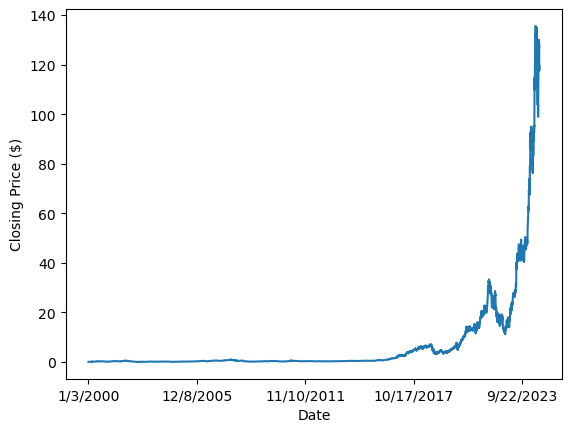

In [30]:
# extract date
Date = data['Date']

# plot the line graph
plt.plot(Date, Close)

# label the axes
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')

# control x axis tick marks
plt.xticks(Date[::1492])

plt.show()